# Plot the data
Read the file ["Readme.ipynb"](Readme.ipynb) for more information.

## Modules
Needed to use non-Python functionalities already programmed by someone else.

In [1]:
# Used to cast the polygons into np.arrays and afterwards transpose them easily with the .T function
import numpy as np
import matplotlib.pyplot as plt    # to plot the counties
# Used to determine which part of the plot should be saved
from matplotlib.transforms import Bbox
# Used to underline text in plots
from matplotlib import rc

## Get the Data
Read the file ["Readme.ipynb"](Readme.ipynb) or check out the files ["get_data.ipynb"](get_data.ipynb) and ["get_geographical_data_of_german_counties.ipynb"](get_geographical_data_of_german_counties.ipynb) for more information about the data collection.

In [2]:
%run get_data.ipynb
print("All data is ready!")

Polished county data from file is ready to go!
Polished covid19 data from file is ready to go!
All data is ready!


## Control
Set variables to "True" to trigger the action described by the comment and the variable's name.

In [3]:
get_likeliest_shift_of_all_counties_correlations = True
get_sum_of_all_counties_correlations = True # overwrites the above

## Function to calculate the probability of correlations between two arrays

In [4]:
%run get_scaled_correlation.ipynb

In [5]:
AdmUnitIds4digits = list()
AdmUnitIds5digits = list()
for AdmUnitId in covid19.keys():
    if len(AdmUnitId) == 4: AdmUnitIds4digits.append(AdmUnitId)
    elif len(AdmUnitId) == 5: AdmUnitIds5digits.append(AdmUnitId)
    else:
        print(AdmUnitId)
        raise Exception("AdmUnitId too long")
AdmUnitIds4digits.sort()
AdmUnitIds5digits.sort()
AdmUnitIds = AdmUnitIds4digits + AdmUnitIds5digits
print(AdmUnitIds)

['1001', '1002', '1003', '1004', '1051', '1053', '1054', '1055', '1056', '1057', '1058', '1059', '1060', '1061', '1062', '2000', '3101', '3102', '3103', '3151', '3153', '3154', '3155', '3157', '3158', '3159', '3241', '3251', '3252', '3254', '3255', '3256', '3257', '3351', '3352', '3353', '3354', '3355', '3356', '3357', '3358', '3359', '3360', '3361', '3401', '3402', '3403', '3404', '3405', '3451', '3452', '3453', '3454', '3455', '3456', '3457', '3458', '3459', '3460', '3461', '3462', '4011', '4012', '5111', '5112', '5113', '5114', '5116', '5117', '5119', '5120', '5122', '5124', '5154', '5158', '5162', '5166', '5170', '5314', '5315', '5316', '5334', '5358', '5362', '5366', '5370', '5374', '5378', '5382', '5512', '5513', '5515', '5554', '5558', '5562', '5566', '5570', '5711', '5754', '5758', '5762', '5766', '5770', '5774', '5911', '5913', '5914', '5915', '5916', '5954', '5958', '5962', '5966', '5970', '5974', '5978', '6411', '6412', '6413', '6414', '6431', '6432', '6433', '6434', '6435',

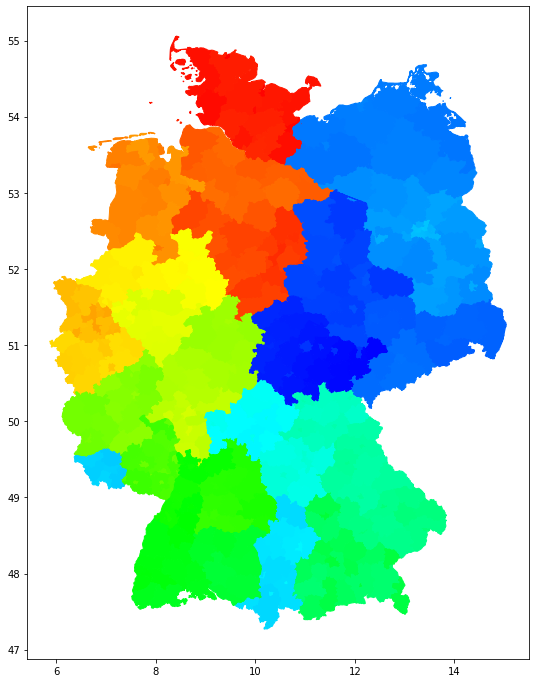

In [6]:
plt.figure(figsize=(9, 12))    # enlarge plot
i = 0
for AdmUnitID in AdmUnitIds:
    if i < 100: color = (1, i/100, 0)
    elif i < 200: color = (1-(i-100)/100, 1, 0)
    elif i < 300: color = (0, 1, (i-200)/100)
    else: color = (0, 1-(i-300)/112, 1)
    i+=1
    for polygon in counties_geography[AdmUnitID]['geometry']:
        x,y = np.array(polygon).T
        plt.fill(x, y, color=color)
plt.show()

In [7]:
correlation_matrix = [[0 for c2 in range(len(AdmUnitIds))] for c1 in range(len(AdmUnitIds))]
for AdmUnitId1 in AdmUnitIds:
    for AdmUnitId2 in AdmUnitIds:
        if AdmUnitId1 == AdmUnitId2: continue
        if correlation_matrix[AdmUnitIds.index(AdmUnitId1)][AdmUnitIds.index(AdmUnitId2)] != 0: continue
        if get_likeliest_shift_of_all_counties_correlations:
            offset = get_scaled_correlation(covid19[AdmUnitId1]['incidences'],
                                            covid19[AdmUnitId2]['incidences'])[3]
        
        if get_sum_of_all_counties_correlations:
            correlation = get_scaled_correlation(covid19[AdmUnitId1]['incidences'],
                                                 covid19[AdmUnitId2]['incidences'])[0]
            offset = sum(correlation[:len(correlation)//2]) - sum(correlation[len(correlation)//2 + 1:])

        correlation_matrix[AdmUnitIds.index(AdmUnitId1)][AdmUnitIds.index(AdmUnitId2)]=offset
        correlation_matrix[AdmUnitIds.index(AdmUnitId2)][AdmUnitIds.index(AdmUnitId1)]=-offset

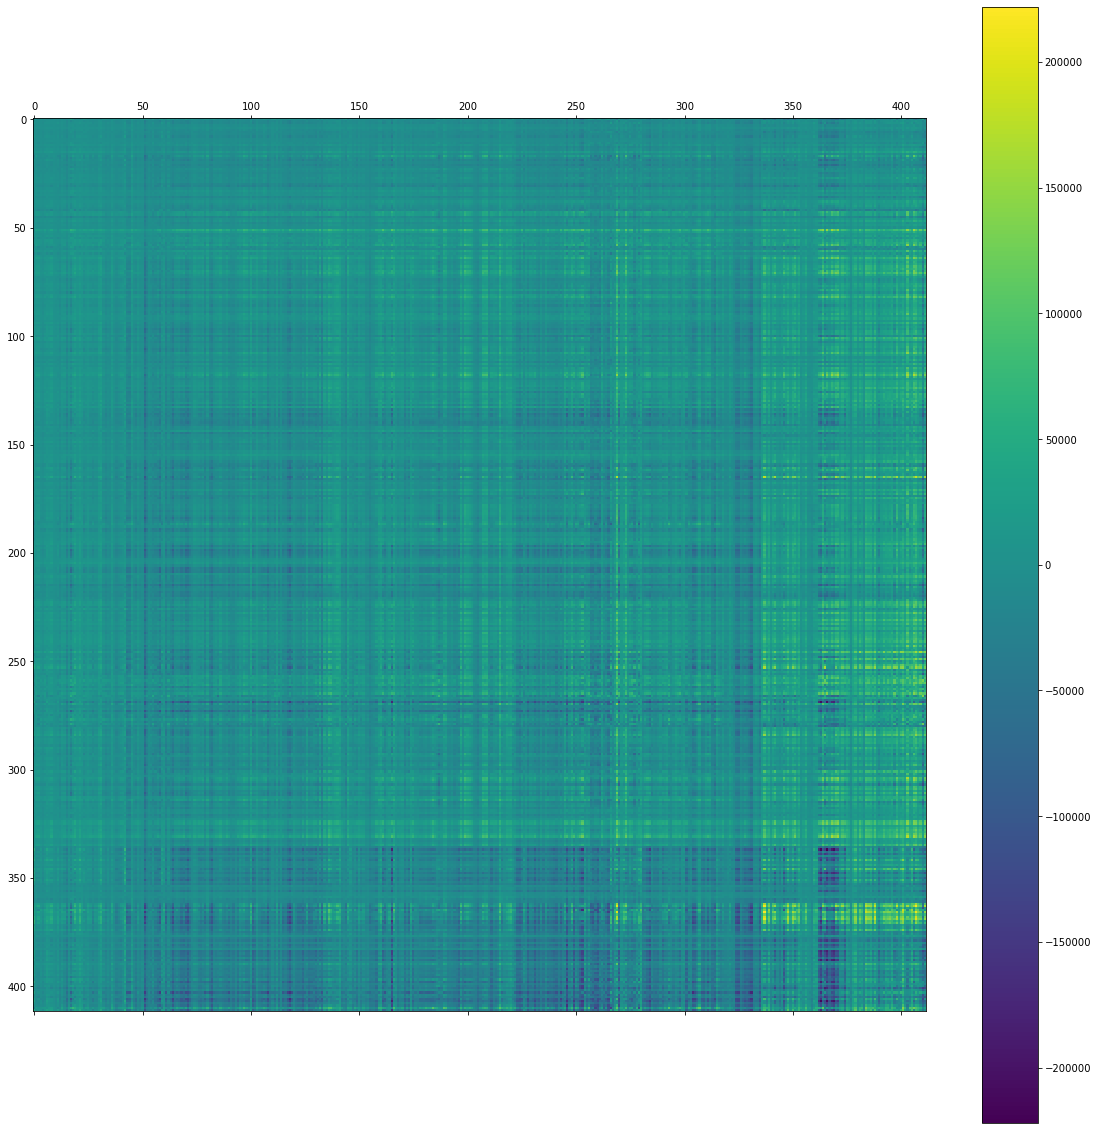

In [8]:
matfig = plt.figure(figsize=(20,20))
plt.matshow(correlation_matrix, fignum=matfig.number)
plt.colorbar()

In [9]:
average_correlation = dict()
for row_index in range(len(correlation_matrix)):
    row = correlation_matrix[row_index]
    AdmUnitID = AdmUnitIds[row_index]
    average_correlation[AdmUnitID]=(sum(row)/len(row))

-49443.1747572815550173.172330097084


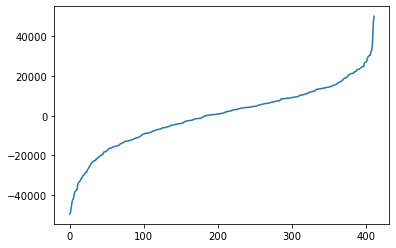

In [10]:
average_correlation_copy = list(average_correlation.values())[:]
average_correlation_copy.sort()
print(str(average_correlation_copy[0]) + str(average_correlation_copy[-1]))
plt.plot(average_correlation_copy)

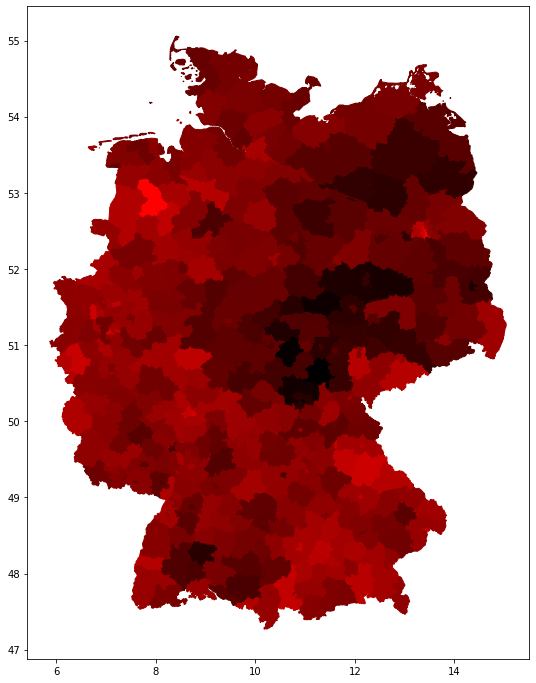

In [11]:
plt.figure(figsize=(9, 12))    # enlarge plot
for AdmUnitID, correlation in average_correlation.items():
    color = ((correlation - average_correlation_copy[0])/
             (average_correlation_copy[-1]-average_correlation_copy[0]), 0, 0)
    for polygon in counties_geography[AdmUnitID]['geometry']:
        x,y = np.array(polygon).T
        plt.fill(x, y, color=color)
plt.show()

66805.59370409738


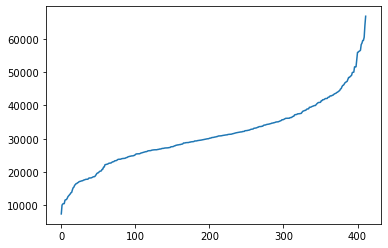

In [12]:
incidences_of_counties_acc = list()
for county in covid19.values():
    incidences_of_counties_acc.append(sum(county["incidences"]))
incidences_of_counties_acc.sort()
print(incidences_of_counties_acc[-1])
plt.plot(incidences_of_counties_acc)

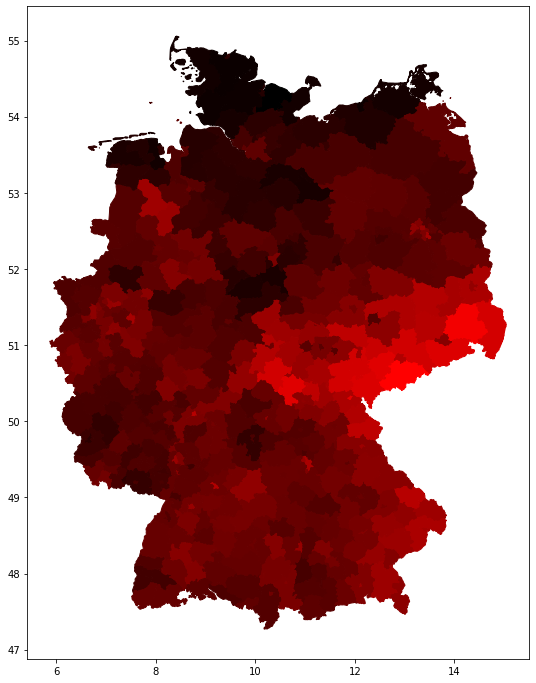

In [13]:
plt.figure(figsize=(9, 12))    # enlarge plot
for AdmUnitID, county in covid19.items():
    color = ((sum(county["incidences"]) - incidences_of_counties_acc[0])/
             (incidences_of_counties_acc[-1] - incidences_of_counties_acc[0]), 0, 0)
    for polygon in counties_geography[AdmUnitID]['geometry']:
        x,y = np.array(polygon).T
        plt.fill(x, y, color=color)
plt.show()